In [1]:
import pandas as pd
import numpy as NP
import matplotlib.pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
})

In [2]:
U_N=400
U_L=85
n=1400/60
f=50
ue=U_N/U_L

In [3]:
I1=[1,2,3,4,4.2,5]
P_A=[0,-8,-16,-28,-28,-30]
P_B=[28,100,210,380,420,500]
P_1=[]
U=[27.5,55,82,107,113,134]
G=[35,85,222,426,464,685]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])
pd.DataFrame(data, columns=["I1","P_A","P_B","P_1","U","G","M_an"]).to_markdown("anlaufmoment.md")

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000

0.00019869525677184555 -0.007889440176336464 0.1909776043553698  
0.1511 x - 0.07306


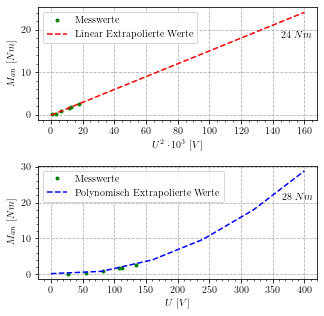

In [4]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = NP.polyfit(U, M_an, 2)
y_pred = NP.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# how good is the fit?
# calculate MSE:
MSE = NP.sqrt( NP.sum((y_pred-M_an)**2)/10 )
# MSE = .2


# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = NP.linspace(0, 160, 6)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = NP.linspace(0, 400, 6)   # choose 20 points, 10 in, 10 outside original range
y_pred = NP.polyval([a, b, c], x_out_poly)

z = NP.polyfit(U1, M_an, 1)
p = NP.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${int(max(p(x_out)))}\ Nm$', xy=(145, max(p(x_out))-6))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte")


plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${int(max(y_pred))}\ Nm$', xy=(365, max(y_pred)-8))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Polynomisch Extrapolierte Werte")

plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.savefig("anlaufmoment.pdf")
print(a,b,c,p)

In [5]:

I1=[1,2,3,4,4.2,5]
P_A=[8,28,60,110,125,180]
P_B=[16,74,320,560,620,866]
P_1=[]
U=[36,73,108,140,148,175]
G=[32,218,508,891,1000,1425]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])
pd.DataFrame(data, columns=["I1","P_A","P_B","P_1","U","G","M_an"]).to_markdown("kippmoment.md")

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000

0.0001976055935301472 -0.002449525260579079 -0.035841563102510736  
0.1863 x - 0.1431


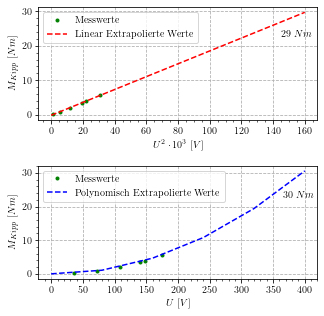

In [6]:

plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = NP.polyfit(U, M_an, 2)
y_pred = NP.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# how good is the fit?
# calculate MSE:
MSE = NP.sqrt( NP.sum((y_pred-M_an)**2)/10 )
# MSE = .2


# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = NP.linspace(0, 160, 6)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = NP.linspace(0, 400, 6)   # choose 20 points, 10 in, 10 outside original range
y_pred = NP.polyval([a, b, c], x_out_poly)

z = NP.polyfit(U1, M_an, 1)
p = NP.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${int(max(p(x_out)))}\ Nm$', xy=(145, max(p(x_out))-7))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte")


plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${int(max(y_pred))}\ Nm$', xy=(365, max(y_pred)-8))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Polynomisch Extrapolierte Werte")

plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.savefig("kippmoment.pdf")
print(a,b,c,p)